In [6]:
import pandas as pd

%matplotlib inline

In [77]:
data = pd.read_csv('house_prices.csv')

In [78]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
data.shape

(1460, 81)

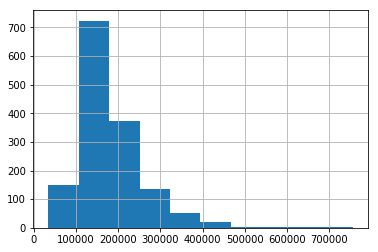

In [80]:
data.SalePrice.hist()

In [81]:
str_cols = data.columns[data.dtypes == 'object']

In [82]:
str_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [83]:
for col in str_cols:
    del data[col]

In [84]:
data.dropna(inplace=True)

In [85]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [86]:
data.shape

(1460, 38)

In [16]:
del data['Id']

In [17]:
y = data['SalePrice']

In [18]:
del data['SalePrice']

In [19]:
from sklearn.model_selection import train_test_split

In [64]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = Deci()

In [67]:
model.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
prediction = model.predict(Xtest)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [70]:
math.sqrt(mean_squared_error(prediction, Ytest))

36836.908845841135

In [71]:
mean_absolute_error(prediction, Ytest)

22975.856509152825

In [63]:
model.coef_

array([-2.02698792e+02, -1.30704042e+02,  4.56210984e-01,  1.79601487e+04,
        4.15243490e+03,  2.69396195e+02,  1.71917974e+02,  2.49082239e+01,
        9.15961220e+00, -2.76339673e+00, -5.40519454e-01,  5.85569602e+00,
        1.28037560e+01,  1.41064795e+01,  5.07620468e+00,  3.19864402e+01,
        1.12709218e+04, -1.08143375e+03,  2.90018082e+03, -2.29747992e+03,
       -8.66953909e+03, -9.21244358e+03,  5.08512840e+03,  4.82240591e+03,
        1.32503900e+02,  1.23730713e+04, -4.29583441e+00,  2.15429666e+01,
       -5.80450096e+00,  9.39060545e+00,  4.07901766e+01,  6.37208076e+01,
       -2.01051471e+01, -6.51509147e-01, -1.55707170e+02, -5.38525560e+02])

In [73]:
y.mean()

180921.19589041095

In [74]:
y.median()

163000.0

In [75]:
model.predict([data.iloc[0]])

array([231227.01195545])